In [3]:
#matplotlib inline for showing graphs in notebook as inline result
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#for setting size of figures
plt.rcParams['figure.figsize']=(20.0,10.0)

#Reading Data
data = pd.read_csv('headbrain.csv')
#print dimensions 
print(data.shape)
#take a look of data frame
data.head()


(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
#intialization of independent and dependent variable vectors
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [7]:
# Mean of X and Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b0 and b1
numerator = 0
denominator = 0
for i in range(m):
    numerator += (X[i] - mean_X) * (Y[i] - mean_Y)
    denominator += (X[i] - mean_X) * (X[i] - mean_X)
b1 = numerator/denominator
b0 = mean_Y - (b1 * mean_X)

# Print coefficients (Also called weights)
print(b1,b0)

0.26342933948939945 325.57342104944223


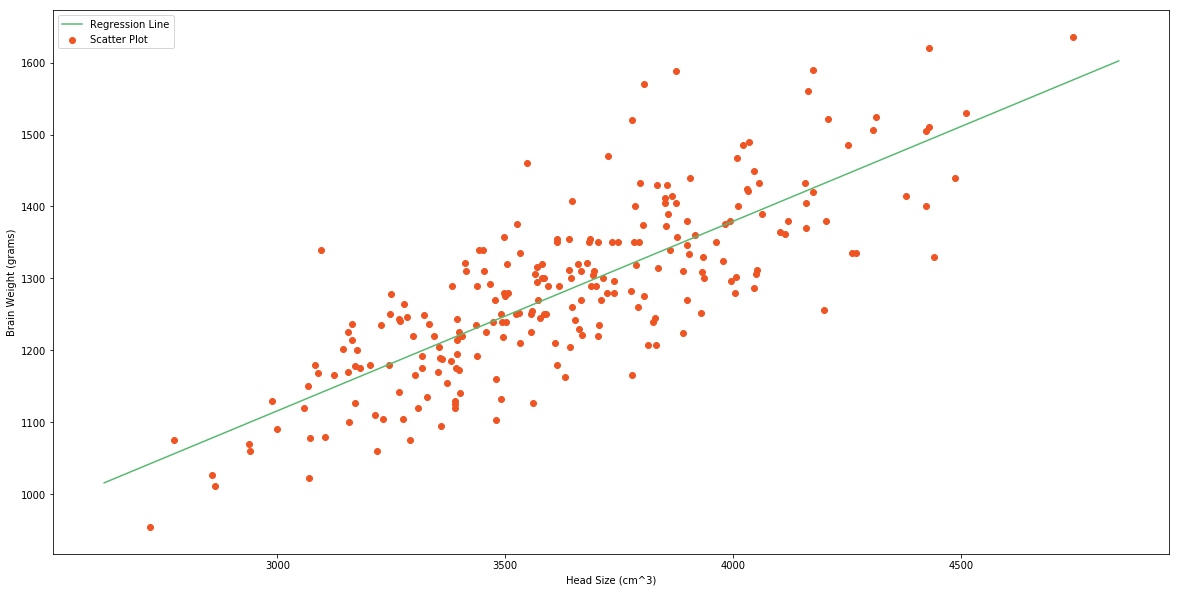

In [9]:
# Plotting X-Y graph and regression line
max_X=np.max(X)+100
min_X=np.min(X)-100

#Calculating line values x and y
#linspace() Return evenly spaced numbers over a specified interval
x = np.linspace(min_X,max_X,1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

In [10]:
#Finding how is our model calculating root mean square error
# lower the rmse value to 1 better the regression model (infact rmse is minimum here) 
rmse = 0
for i in range(m):
    y_pred = (Y[i]-(b0 + b1*X[i]))
    rmse += (y_pred * y_pred)
#Root mean square error
rmse=np.sqrt(rmse/m)    
print(rmse)    

72.1206213783709


In [11]:
# SS_t is the total sum of squares and SS_r is the total sum of squares of residuals. 
# closer the r^2 value to 1 better the regression model 
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_Y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003
